# Fatal Police Shooting in the United States

Investigate fatal police shootings throughout the United States of America, provide a list of issues, and propose a plan on how to tackle these issues.

Requirements: <br>
* Perform data cleaning and feature engineering. Work with features - handle missing data if needed, use Pandas date APIs, create other additional features.<br>
* Perform exploratory data analysis. Describe the data with basic statistical parameters - mean, median, quantiles, etc. Use parameters that give you the most important statistical insights of the data. Grouping the data and analyzing the groups - using Pandas aggregate methods. Visualize the data - you can use line, scatter, histogram plots, density plots, regplots, etc.<br>
* Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.<br>
* Present the project - the data, methods, and results.<br>
* Provide suggestions about how your analysis can be improved.

**Hypothesis:** the database reflects the criminogenic situation in society, so I have put forward a series of key questions to identify the causes of police brutality:<br>
* whether the number of victims reflects the current unemployment rate in the country;<br>
* whether the number of victims is linked to low hourly wages, which could reflect the general level of well-being in the country.<br>
* whether the number of victims is related to race;<br>
* whether police brutality can be seen as a solution to a dangerous situation;<br>
* what preventive measures can be offered in the workplace to reduce the number of fatal incidents.

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter

<IPython.core.display.Javascript object>

* The dataset is from: https://www.kaggle.com/datasets/washingtonpost/police-shootings

## Data Exploration

In [77]:
df = pd.read_csv("database.csv")
df.drop(labels="id", axis=1, inplace=True)
df.tail()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2137,James Leroy Marker,2017-02-26,shot,gun,66.0,M,W,Floral City,FL,False,other,Car,False
2138,Joey J. Bridges,2017-02-27,shot,gun,27.0,M,W,Shelby,NC,True,attack,Foot,False
2139,Shawn M. Igers,2017-02-27,shot,gun,40.0,M,W,Corning,WI,False,attack,Not fleeing,False
2140,Earl Riley,2017-02-28,shot,gun,25.0,M,B,Houston,TX,False,attack,Not fleeing,False
2141,Christopher Redding,2017-02-28,shot,gun,20.0,M,B,Orlando,FL,False,attack,Foot,False


<IPython.core.display.Javascript object>

* Find the shape of the database:

In [67]:
df.shape

(2142, 13)

<IPython.core.display.Javascript object>

In [68]:
print("Number of rows in the dataset: ", df.shape[0])
print("Number of columns in the dataset: ", df.shape[1])

Number of rows in the dataset:  2142
Number of columns in the dataset:  13


<IPython.core.display.Javascript object>

* Show information about dataset: like datatypes of each column and memory requirement:

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     2123 non-null   object 
 1   date                     2142 non-null   object 
 2   manner_of_death          2142 non-null   object 
 3   armed                    2136 non-null   object 
 4   age                      2099 non-null   float64
 5   gender                   2141 non-null   object 
 6   race                     2039 non-null   object 
 7   city                     2142 non-null   object 
 8   state                    2142 non-null   object 
 9   signs_of_mental_illness  2142 non-null   bool   
 10  threat_level             2142 non-null   object 
 11  flee                     2106 non-null   object 
 12  body_camera              2142 non-null   bool   
dtypes: bool(2), float64(1), object(10)
memory usage: 188.4+ KB


<IPython.core.display.Javascript object>

* For better readability let's add full state name as separate colum.

In [78]:
state_name = {
    "AL": "Alabama",
    "AK": "Alaska",
    "AZ": "Arizona",
    "AR": "Arkansas",
    "CA": "California",
    "CO": "Colorado",
    "CT": "Connecticut",
    "DE": "Delaware",
    "DC": "District of Columbia",
    "FL": "Florida",
    "GA": "Georgia",
    "HI": "Hawaii",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "IA": "Iowa",
    "KS": "Kansas",
    "KY": "Kentucky",
    "LA": "Louisiana",
    "ME": "Maine",
    "MD": "Maryland",
    "MA": "Massachusetts",
    "MI": "Michigan",
    "MN": "Minnesota",
    "MS": "Mississippi",
    "MO": "Missouri",
    "MT": "Montana",
    "NE": "Nebraska",
    "NV": "Nevada",
    "NH": "New Hampshire",
    "NJ": "New Jersey",
    "NM": "New Mexico",
    "NY": "New York",
    "NC": "North Carolina",
    "ND": "North Dakota",
    "OH": "Ohio",
    "OK": "Oklahoma",
    "OR": "Oregon",
    "PA": "Pennsylvania",
    "RI": "Rhode Island",
    "SC": "South Carolina",
    "SD": "South Dakota",
    "TN": "Tennessee",
    "TX": "Texas",
    "UT": "Utah",
    "VT": "Vermont",
    "VA": "Virginia",
    "WA": "Washington",
    "WV": " West Virginia",
    "WI": "Wisconsin",
    "WY": "Wyoming",
    "AS": "American Samoa",
    "GU": "Guam",
    "MP": "Northern Mariana Islands",
    "PR": "Puerto Rico",
    "VI": "U.S. Virgin Islands",
}
df["state_name"] = df["state"].map(state_name)
df = df.reindex(
    columns=[
        "name",
        "date",
        "manner_of_death",
        "armed",
        "age",
        "gender",
        "race",
        "city",
        "state",
        "state_name",
        "signs_of_mental_illness",
        "threat_level",
        "flee",
        "body_camera",
    ]
)
df.head()

,name,date,manner_of_death,armed,age,gender,race,city,state,state_name,signs_of_mental_illness,threat_level,flee,body_camera
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,Washington,True,attack,Not fleeing,False
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,Oregon,False,attack,Not fleeing,False
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,Kansas,False,other,Not fleeing,False
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,California,True,attack,Not fleeing,False
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,Colorado,False,attack,Not fleeing,False


<IPython.core.display.Javascript object>

* Check what is the percetage of missing values:

In [79]:
perc_missing = round(df.isnull().sum() * 100 / len(df), 2)
perc_missing

name                       0.89
date                       0.00
manner_of_death            0.00
armed                      0.28
age                        2.01
gender                     0.05
race                       4.81
city                       0.00
state                      0.00
state_name                 0.00
signs_of_mental_illness    0.00
threat_level               0.00
flee                       1.68
body_camera                0.00
dtype: float64

<IPython.core.display.Javascript object>

Conclusions:<br> 
* most of missing data is in 'race' column: 4.81 % data, <br>
* 2.01 % data is missing in 'age' column,<br>
* 1.68 % is missing in 'flee' column,<br>
* 0.89 % data missing the name,<br>
* 0.28 % is uknown if the victim was armed or not,<br>
* 0.05 % victim gender is  uknown.<br>
Generally,  if less than 5% of values are missing then it is acceptable to ignore them. In my further analysis I will try to fill the missing data with additional information.

In [80]:
print("Earliest date:", df["date"].min())
print("Latest date:", df["date"].max())

Earliest date: 2015-01-02
Latest date: 2017-02-28


<IPython.core.display.Javascript object>

* For more accurate analysis let's change 'date' column to date format and extract only year and check the victim number change:

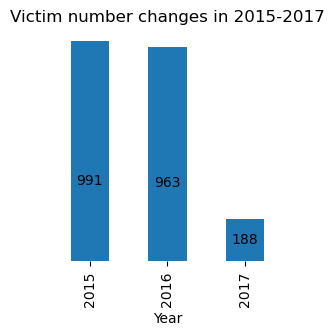

<IPython.core.display.Javascript object>

In [81]:
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
df["date"] = pd.DatetimeIndex(df["date"]).year
plt.figure(figsize=(3, 3))
victim_counts = df["date"].value_counts()
ax = victim_counts.plot(kind="bar")
plt.title("Victim number changes in 2015-2017")
plt.xlabel("Year")
plt.yticks(ticks=[], label="")
for i, v in enumerate(victim_counts):
    ax.annotate(str(v), xy=(i, v / 3.0), ha="center", va="bottom")
for spine in plt.gca().spines.values():
    spine.set_visible(False)

Conclusion:<br>
* The significant change in 2017 is due to the lack of full information. The last entrance was made in February 2017.

* Get overall statistics of the dataset

In [82]:
df.describe(include="all", datetime_is_numeric=True)

,name,date,manner_of_death,armed,age,gender,race,city,state,state_name,signs_of_mental_illness,threat_level,flee,body_camera
count,2123,2142.000000,2142,2136,2099.000000,2141,2039,2142,2142,2142,2142,2142,2106,2142
unique,2118,NaN,2,64,NaN,2,6,1247,51,51,2,3,4,2
top,Eric Harris,NaN,shot,gun,NaN,M,W,Los Angeles,CA,California,False,attack,Not fleeing,False
freq,2,NaN,1992,1173,NaN,2052,1041,31,355,355,1612,1381,1453,1913
mean,NaN,2015.625117,NaN,NaN,36.484516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.640370,NaN,NaN,12.874000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2015.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2015.000000,NaN,NaN,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2016.000000,NaN,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,NaN,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

* Check if any names are duplicated in the dataset and if so drop them:<br>
(assuming that duplications are best revealed by 'name','date','state' columns)<br>
* **Note:** to check all entrances: df[df[['name','date','state']].duplicated(keep=False)]

In [83]:
df = df.drop_duplicates(subset=["name", "state", "city"], keep="first")

<IPython.core.display.Javascript object>

### How Incidents Are Differentiated by Gender?

* As the graph below shows the distribution of victims by gender. 
The majority of victims are male.

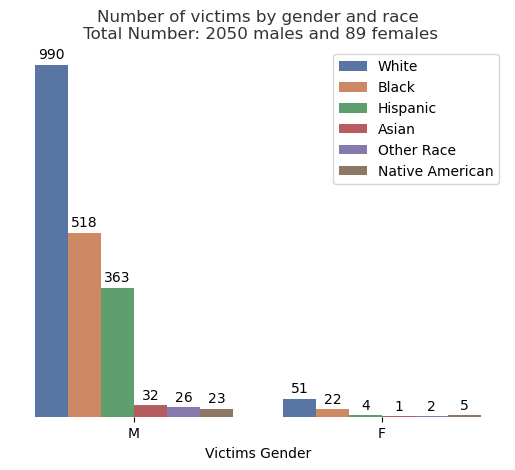

<IPython.core.display.Javascript object>

In [109]:
race_order = df["race"].value_counts().sort_values(ascending=False).index.tolist()
gender_race = sns.countplot(
    x="gender",
    data=df,
    hue="race",
    palette="deep",
    hue_order=race_order,
)
for i in gender_race.patches:
    gender_race.annotate(
        f"{i.get_height():.0f}",
        (i.get_x() + i.get_width() / 2.0, i.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),
        textcoords="offset pixels",
    )

gender_race.set(yticks=[], ylabel="")
plt.legend(
    labels=["White", "Black", "Hispanic", "Asian", "Other Race", "Native American"]
)
plt.xlabel("Victims Gender")
plt.title(
    "Number of victims by gender and race\n Total Number: {} males and {} females".format(
        df["gender"].value_counts()[0], df["gender"].value_counts()[1]
    ),
    alpha=0.8,
)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

### How Incidents Differenciate by age?

* Most victims are aged between 20 and 40, and the plot below confirms this.

In [114]:
print("The youngest victim: {} years".format(df["age"].min()))
print("The oldest victim: {} years".format(df["age"].max()))

The youngest victim: 6.0 years
The oldest victim: 86.0 years


<IPython.core.display.Javascript object>

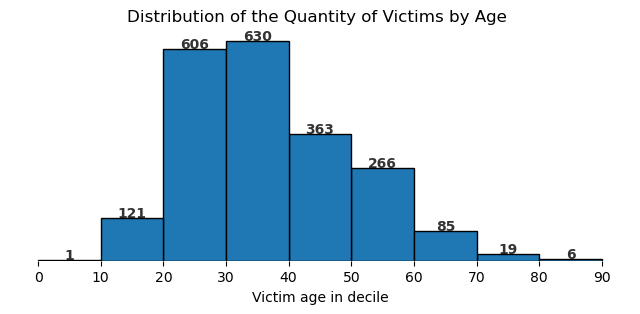

<IPython.core.display.Javascript object>

In [251]:
df = df.dropna(subset=["age"])
ages = df["age"].tolist()
plt.figure(figsize=(8, 3))
age_histogram = Counter(min(age // 10 * 10, 90) for age in ages)
distribution = plt.bar(
    [x + 5 for x in age_histogram.keys()], age_histogram.values(), width=10, edgecolor=(0, 0, 0)
)
for x, count in zip([x + 5 for x in age_histogram.keys()], age_histogram.values()):
    plt.text(
        x,
        count + 2,
        str(count),
        ha="center",
        color="k",
        fontsize=10,
        fontweight="black",
        alpha=0.8,
    )
plt.xticks([10 * i for i in range(10)])
plt.xlabel("Victim age in decile")
plt.yticks(ticks=[], label="")
plt.title("Distribution of the Quantity of Victims by Age ")
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

* The graph below shows that the distribution by age and race corresponds to the racial distribution of the population:
the majority of victims are of working age, white, black and Hispanic races. 

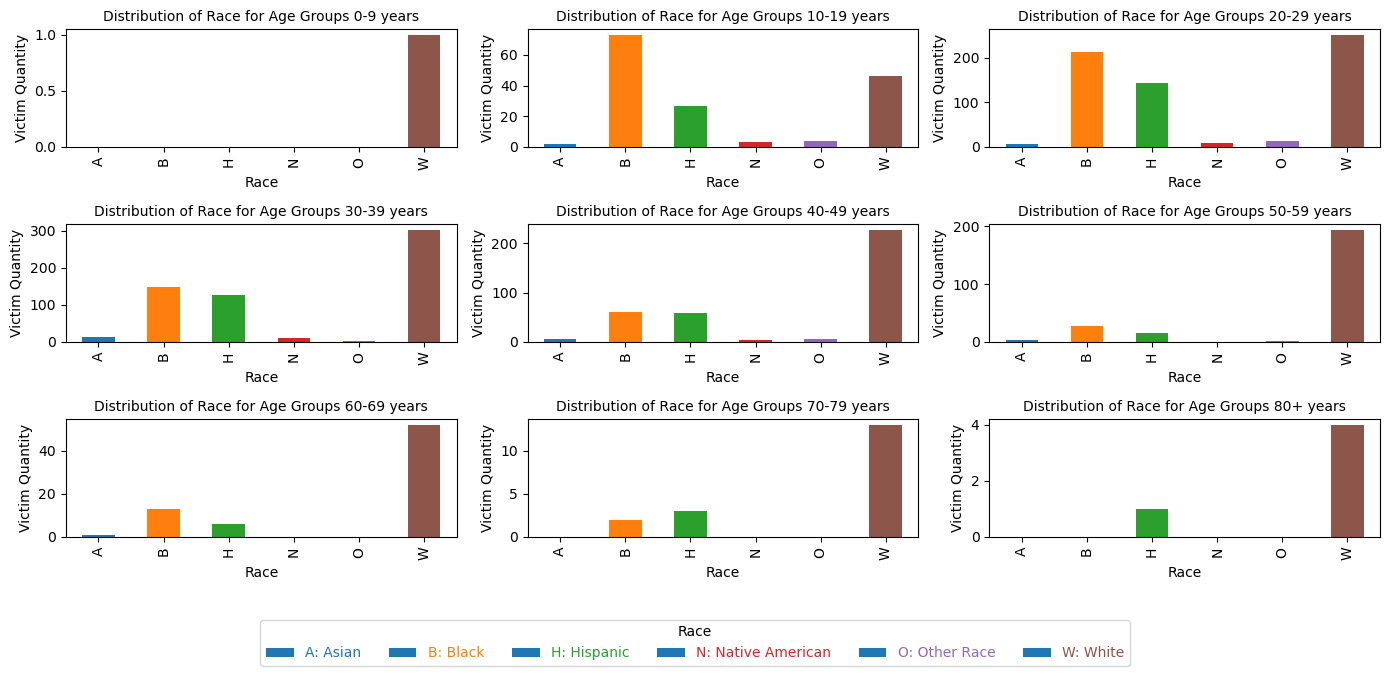

<IPython.core.display.Javascript object>

In [250]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"]
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels)
race_counts = df.groupby(["race", "age_group"]).size().unstack()
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(14, 6))

ages = race_counts.columns.tolist()
ages_index = 0
for i in range(3):
    for j in range(3):
        if ages_index < len(ages):
            age = ages[ages_index]
            ax = axs[i, j]
            race_counts[age].plot(kind="bar", ax=ax, color=plt.cm.tab10(range(6)))
            ax.set_xlabel("Race")
            ax.set_ylabel("Victim Quantity")
            ax.set_title(
                f"Distribution of Race for Age Groups {age} years", fontsize=10
            )
            ages_index += 1
        else:
            break

fig.legend(
    labels=[
        "A: Asian",
        "B: Black",
        "H: Hispanic",
        "N: Native American",
        "O: Other Race",
        "W: White",
    ],
    prop={"size": 10},
    title="Race",
    title_fontsize=10,
    labelcolor=plt.cm.tab10(range(6)),
    loc="upper center",
    ncol=6,
    bbox_to_anchor=(0.5, -0.03),
    bbox_transform=plt.gcf().transFigure,
)
plt.subplots_adjust(right=1.2)
plt.tight_layout()

Conclusion:<br>
* As we can see, the available data show that the majority of victims are men of working age. The question is whether the unemployment rate in the state is relevant in this case. 

Since we found that most missing data is from 'race' column, let's check if we can replace missing values. 
Most common way would be to use mode function and replace missing value with the most frequently recurring race in
the state of the accident. However this method is not efficient if we have more than one frequent races.
so my approach would be demographic distribution by race in each state.

### TOP 3 states with highest incident rate?

* For further investigation let's check the states with highest victim quantity:

In [48]:
df['state_name'].value_counts().head(3)

California    345
Texas         190
Florida       126
Name: state_name, dtype: int64

### How Does Unemployment Affect the Number of Victims?

* Let's see the top 3 states with the highest unemployment rate in 2016:<br>
 ***Note:*** dataset is taken: https://www.kaggle.com/datasets/jayrav13/unemployment-by-county-us

In [249]:
work_df = pd.read_csv("output.csv")
work_df = work_df[work_df["Year"] == 2016]
top_unemploid = (
    work_df.groupby(["State"])
    .agg({"Rate": "mean"})
    .sort_values(by="Rate", ascending=False)[:3]
)
top_unemploid

,Rate
State,
Arizona,7.732778
Louisiana,7.224414
West Virginia,7.023939


<IPython.core.display.Javascript object>

* As we can see the states with most victim number do not correlate with states with highest unemployment rate.

### Does the State Minimum Wage Affect the High Number of Victims?

* To find the actual minimum wage in every state I will use additional dataset.

**Note:** dataset is taken: https://www.kaggle.com/datasets/lislejoem/us-minimum-wage-by-state-from-1968-to-2017

In [248]:
wage = pd.read_csv(r"Minimum Wage Data.csv", encoding="cp1252")
wage = wage[["Year", "State", "State.Minimum.Wage", "Federal.Minimum.Wage"]]
wage = wage[wage["Year"] == 2016]
wage.loc[wage["State.Minimum.Wage"] == 0.00, "State.Minimum.Wage"] = wage.loc[
    wage["State.Minimum.Wage"] == 0.00, "Federal.Minimum.Wage"
]
print(
    "States with largest minimum wage, $:\n",
    wage.groupby("State")["State.Minimum.Wage"]
    .max()
    .nlargest(
        3,
    ),
)
print("*" * 50)
print(
    "States with smallest minimum wage, $:\n",
    wage.groupby("State")["State.Minimum.Wage"]
    .min()
    .nsmallest(
        3,
    ),
)

States with largest minimum wage, $:
 State
District of Columbia    11.5
California              10.0
Massachusetts           10.0
Name: State.Minimum.Wage, dtype: float64
**************************************************
States with smallest minimum wage, $:
 State
Oklahoma               2.00
U.S. Virgin Islands    4.30
Puerto Rico            5.08
Name: State.Minimum.Wage, dtype: float64


<IPython.core.display.Javascript object>

Conclusion:
* The assumption that the number of victims depends on the level of unemployment in a country or on the minimum wage being too low is not correct, as the data show that these parameters do not affect the number of victims. On the contrary, California has the second highest hourly wage, and therefore the highest number of victims. This shows that the state is a magnet for people, which is why it has a high number of incidents.

### How the Number of Victims is Racially Distributed?

This socially sensitive issue has become particularly acute since the emergence of the Black lives matter movement in 2013. The issue raised by the activists has led to unrest and active mass resistance not only in the US, but also in other countries, so this aspect is also important to investigate: how the number of victims varies proportionally between the different races present.

For analysis purpose let's get 2020 year racial diversity census from United States Census Bureau: https://www.census.gov/

In [193]:
data = pd.read_csv("DECENNIALPL2020.P1-2023-02-11T163204.csv")
data.head()

,Label (Grouping),Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Puerto Rico
0,Total:,"5,024,279","733,391","7,151,502","3,011,524","39,538,223","5,773,714","3,605,944","989,948","689,545",...,"6,910,840","29,145,505","3,271,616","643,077","8,631,393","7,705,281","1,793,716","5,893,718","576,851","3,285,874"
1,Population of one race:,"4,767,326","643,867","6,154,696","2,797,949","33,777,988","5,066,044","3,273,040","913,430","633,468",...,"6,497,942","24,011,767","2,992,603","606,051","7,925,686","6,868,622","1,708,772","5,534,184","533,378","1,650,083"
2,White alone,"3,220,452","435,392","4,322,337","2,114,512","16,296,122","4,082,927","2,395,128","597,763","273,194",...,"4,990,938","14,609,365","2,573,413","577,751","5,208,856","5,130,920","1,610,749","4,737,545","488,374","560,592"
3,Black or African American alone,"1,296,162","21,898","339,150","453,783","2,237,044","234,828","388,675","218,899","285,810",...,"1,092,948","3,552,997","40,058","9,034","1,607,581","307,565","65,813","376,256","5,232","228,711"
4,American Indian and Alaska Native alone,"33,625","111,575","319,512","27,177","631,016","74,129","16,051","5,148","3,193",...,"28,044","278,948","41,644","2,289","40,007","121,468","3,706","60,428","13,898","17,870"


<IPython.core.display.Javascript object>

* Let's make the data more presentable and accomodate to our needs (change numeric values and summarize columns):

* We need to summarize 4 rows to get 'Native American' and 'Other race' quantity and drop redundant rows:

In [194]:
population = data.loc[[0, 2, 3, 4, 5, 6, 7, 8], :]
convert_to_numeric = lambda x: pd.to_numeric(x.replace(",", ""), errors="coerce")
population.iloc[:, 1:] = population.iloc[:, 1:].applymap(convert_to_numeric)
population.loc["Native American"] = population.iloc[[3, 5], 1:].sum()
population.loc["Other race"] = population.iloc[[6, 7], 1:].sum()
population.drop(index=[4, 6, 7, 8], inplace=True)
population.loc[[2, 3, 5, "Native American", "Other race"], "Label (Grouping)"] = [
    "White",
    "Black",
    "Asian",
    "Native American",
    "Other race",
]
population = population.set_index("Label (Grouping)").T
population = population.astype(int)
population.head()

Label (Grouping),Total:,White,Black,Asian,Native American,Other race
Alabama,5024279,3220452,1296162,76660,36609,394396
Alaska,733391,435392,21898,44032,124273,107796
Arizona,7151502,4322337,339150,257430,335909,1896676
Arkansas,3011524,2114512,453783,51839,41710,349680
California,39538223,16296122,2237044,6085947,788279,14130831


<IPython.core.display.Javascript object>

* Let's change the data into percentages and see what proportion of the population each race represents separately:


In [247]:
def population_proportion(df):
    """Calculate the proportion of races in the population of each state"""
    for column_name in df.columns:
        df[column_name + "_prop,%"] = (
            df[column_name] * 100 / population["Total:"]
        ).round(2)
    return df


pop = population_proportion(population)
pop = population.drop(
    ["White", "Black", "Asian", "Native American", "Other race", "Total:_prop,%"],
    axis=1,
)
pop.head()

Label (Grouping),Total:,"White_prop,%","Black_prop,%","Asian_prop,%","Native American_prop,%","Other race_prop,%","Total:_prop,%_prop,%","White_prop,%_prop,%","Black_prop,%_prop,%","Asian_prop,%_prop,%","Native American_prop,%_prop,%","Other race_prop,%_prop,%"
Alabama,5024279,64.10,25.80,1.53,0.73,7.85,0.00,0.00,0.0,0.0,0.0,0.0
Alaska,733391,59.37,2.99,6.00,16.94,14.70,0.01,0.01,0.0,0.0,0.0,0.0
Arizona,7151502,60.44,4.74,3.60,4.70,26.52,0.00,0.00,0.0,0.0,0.0,0.0
Arkansas,3011524,70.21,15.07,1.72,1.39,11.61,0.00,0.00,0.0,0.0,0.0,0.0
California,39538223,41.22,5.66,15.39,1.99,35.74,-0.00,0.00,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>

*  Now we have population demographic proportions in states and  we can check our police shooting dataset for 'race' missing values. Use mode to replace missing values in every state. If mode reveals that there are more races with the same values - we take the value from our population proportion dataset.

In [246]:
def race_mode(data, column_name):
    """Calculate the mode: the most frequent race appearance in each state. If races are of equal frequency -
    take the most popular race in the state, from census dataset. Fill the missing values accordingly"""
    race_mode = data.groupby("state_name")[column_name].agg(pd.Series.mode)
    data[column_name].fillna(data["state_name"].map(race_mode), inplace=True)
    is_array = race_mode.apply(lambda x: isinstance(x, np.ndarray))
    state_names = race_mode[is_array].index
    code = {
        "White_prop,%": "W",
        "Black_prop,%": "B",
        "Asian_prop,%": "A",
        "Native American_prop,%": "N",
        "Other race_prop,%": "O",
    }
    for i in state_names:
        population_max = pop.loc[i].iloc[1:].idxmax()
        if (data["state_name"].isin(state_names)).any() & (
            population_max in code.keys()
        ):
            data[column_name] = np.where(
                data[column_name].apply(type) == np.ndarray,
                code[population_max],
                data[column_name],
            )

    return data


race_mode(df, "race").head()

,name,date,manner_of_death,armed,age,gender,race,city,state,state_name,signs_of_mental_illness,threat_level,flee,body_camera,age_group
0,Tim Elliot,2015,shot,gun,53.0,M,A,Shelton,WA,Washington,True,attack,Not fleeing,False,50-59
1,Lewis Lee Lembke,2015,shot,gun,47.0,M,W,Aloha,OR,Oregon,False,attack,Not fleeing,False,40-49
2,John Paul Quintero,2015,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,Kansas,False,other,Not fleeing,False,20-29
3,Matthew Hoffman,2015,shot,toy weapon,32.0,M,W,San Francisco,CA,California,True,attack,Not fleeing,False,30-39
4,Michael Rodriguez,2015,shot,nail gun,39.0,M,H,Evans,CO,Colorado,False,attack,Not fleeing,False,30-39


<IPython.core.display.Javascript object>

* Let's check how many victims there are in racial aspect:

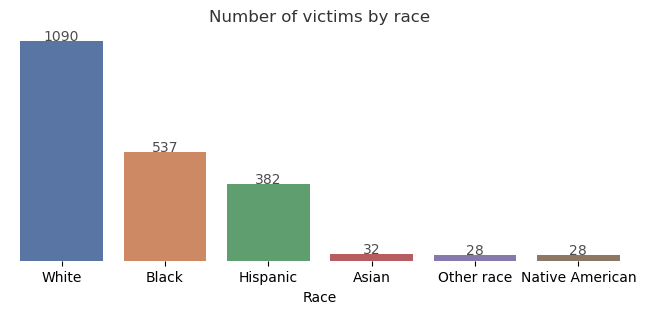

<IPython.core.display.Javascript object>

In [207]:
plt.figure(figsize=(8, 3))
race_plot = sns.countplot(
    x="race",
    data=df,
    palette="deep",
    linewidth=0.5,
    order=df["race"].value_counts().index,
)
counts = df["race"].value_counts(sort=True)
for i in range(len(counts)):
    race_plot.text(
        i,
        counts[i] + 3,
        counts[i],
        fontdict=dict(color="k", fontsize=10),
        horizontalalignment="center",
        alpha=0.7,
    )
race_plot.set_xticklabels(
    ["White", "Black", "Hispanic", "Asian", "Other race", "Native American"]
)
plt.xlabel("Race")
race_plot.set(yticks=[], ylabel="")
plt.title("Number of victims by race", alpha=0.8)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

If we compare the number of victims, this would be consistent with the overall representation of the population in the USA, where the majority of the population is white, but this would not be correct if we look at the racial distribution of the population. Police brutality is thought to be more pronounced in populated areas where unemployment is high or where the overall wealth of the state is lowest.

In [208]:
print("White Population Number in USA: ", population["White"].sum())
print("Black Population Number in USA: ", population["Black"].sum())
print("Asian Population Number in USA: ", population["Asian"].sum())
print(
    "Other race (including hispanic) Population Number in USA: ",
    population["Other race"].sum(),
)
print("Native Population Number in USA: ", population["Native American"].sum())

White Population Number in USA:  204837865
Black Population Number in USA:  41332911
Asian Population Number in USA:  19890050
Other race (including hispanic) Population Number in USA:  64238765
Native Population Number in USA:  4435564


<IPython.core.display.Javascript object>

* Let's check how is the number of victims reflected in the racial distribution of the US:

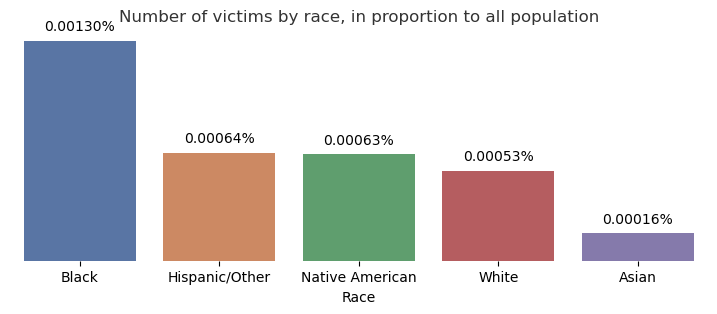

<IPython.core.display.Javascript object>

In [220]:
def calculate_proportions(kill_data, census_data):
    """Function calculates races from police shooting dataset and in total population census dataset proportions"""
    proportion_w = (
        kill_data["race"].value_counts()["W"] * 100 / census_data["White"].sum()
    )
    proportion_b = (
        kill_data["race"].value_counts()["B"] * 100 / census_data["Black"].sum()
    )
    proportion_a = (
        kill_data["race"].value_counts()["A"] * 100 / census_data["Asian"].sum()
    )
    proportion_h_o = (
        (
            (kill_data["race"].value_counts()["H"])
            + (kill_data["race"].value_counts()["O"])
        )
        * 100
        / (census_data["Other race"].sum())
    )
    proportion_n = (
        kill_data["race"].value_counts()["N"]
        * 100
        / census_data["Native American"].sum()
    )
    data_total = {
        "proportion,%": [
            proportion_w,
            proportion_b,
            proportion_a,
            proportion_h_o,
            proportion_n,
        ]
    }
    labels = "W", "B", "A", "H/O", "N"
    proportion = pd.DataFrame(data=data_total, index=labels)
    return proportion


racial_proportion = calculate_proportions(df, population)
racial_proportion_sorted = racial_proportion.sort_values(
    by="proportion,%", ascending=False
).T
plt.figure(figsize=(9, 3))
race_prop = sns.barplot(data=racial_proportion_sorted, palette="deep", linewidth=0.5)
race_prop.set_xticklabels(
    ["Black", "Hispanic/Other", "Native American", "White", "Asian"]
)
for i in race_prop.patches:
    race_prop.annotate(
        f"{i.get_height():.5f}%",
        (i.get_x() + i.get_width() / 2.0, i.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),
        textcoords="offset points",
    )

race_prop.set(yticks=[], ylabel="")
plt.xlabel("Race")
plt.title("Number of victims by race, in proportion to all population", alpha=0.8)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

Conclusion: <br>
* As we can see from the graph, the number of victims is clearly dominated by Black race, so the Black lives matter movement and the resulting protests certainly have merit.

### How Was the Victim Armed or Unarmed, What Caused the Fatal Incident?

* Let's choose the top 10 ways how victims were armed (or not):

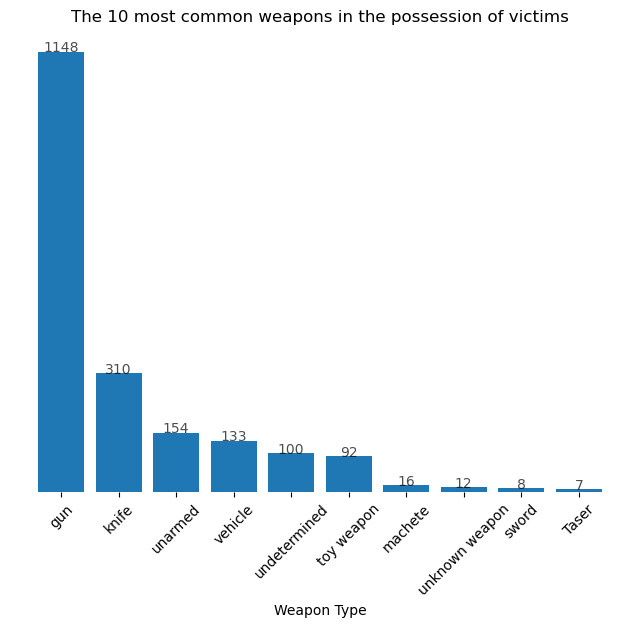

<IPython.core.display.Javascript object>

In [244]:
weapon = df["armed"].value_counts()[:10]
plt.figure(figsize=(8, 6))
bars = plt.bar(weapon.index, weapon.values)
for i, bar in enumerate(bars):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        weapon.values[i],
        fontdict=dict(color="k", fontsize=10),
        horizontalalignment="center",
        alpha=0.7,
    )
plt.title("The 10 most common weapons in the possession of victims")
plt.xlabel("Weapon Type")
plt.yticks([])
plt.xticks(rotation=45)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

Conclusion:
* as we can see, most of the victims were armed, which may partly justify the reaction of the officer as an act of self-defence. However, cases where the victims were unarmed or the weapon was unidentified are not uncommon, and the existence of such victims should be investigated in order to avoid this in the future.

### What Affect is the Police Work Monitoring to the Victim Rate?

* From the initial database we have been given, the body_camera column catches the eye: what is the impact of direct observation of a policeman's work?

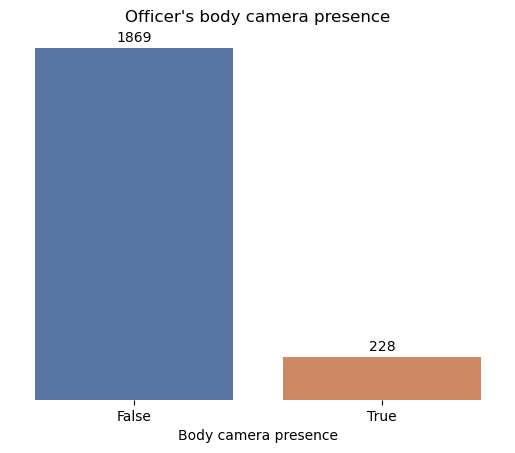

<IPython.core.display.Javascript object>

In [218]:
camera = sns.countplot(x="body_camera", data=df, palette="deep")
for i in camera.patches:
    camera.annotate(
        f"{i.get_height():.0f}",
        (i.get_x() + i.get_width() / 2.0, i.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),
        textcoords="offset pixels",
    )

camera.set(yticks=[], ylabel="")
plt.xlabel("Body camera presence")
plt.title("Officer's body camera presence")
for spine in plt.gca().spines.values():
    spine.set_visible(False)

Conclusion:
* The data shows that police brutality can only be controlled by monitoring the working methods of the police. The presence of modern surveillance technologies not only controls the monitoring of the punitive methods used by the officers, but also allows for the tracking and analysis of the ways of preventing incidents. 

## Conclusions:

The Black Lives Matter movement in the US, which started in 2013, has led to a lot of outrage and additional questions about the use of police force. The purpose of the analysis was to find out whether brutality is really directed specifically at non-whites, and what might have caused such actions to occur.
* The data show that, although the highest number of victims is among the white population, the proportion of the population reveals quite different figures: the highest proportions of victims are among the black and Hispanic population.
* The next question is what might influence the number of incidents in the 20-40 year old male population. The most common hypothesis is that high unemployment and low wages increase the criminogenic situation. However, these hypotheses have not been confirmed, or have been partially confirmed: the unemployment rate and low hourly wages do not have an impact, but on the contrary, the state (California) which has the highest number of recorded fatal incidents offers one of the highest hourly wages. I believe that this factor is the biggest population pull factor in the number of incidents.
* Another interesting fact: most deaths occur when the victim is armed with a firearm, as well as with other dangerous weapons, so that the officer's reaction can be justified as complacent. The large number of incidents (266) where the victim was unarmed and the weapon was not identified makes it necessary to look into the situation, and these incidents are grounds for indignation against police brutality.
* The use of newer technologies (such as video cameras) shows a marked reduction in fatal incidents. This type of control is probably the most effective way of dealing with the legality of excessive use of force.

## Improvements:

The racial aspects of the database should be expanded:
* the race of the police officer who used the force that caused the fatal accident is not indicated. This aspect would significantly change the attitudes if the racial background is the main reason for the outrage in society. 
* It would also be interesting to examine whether the police stations have racial population proportions that reflect those of the existing in state population. 

* To improve the graphical presentation of information and visualisation of the work, further development of the Seaborn, Matplotlib libraries is needed;<br>
* further study of Pandas, Numpy is also needed to improve the quality of the code itself.